<a href="https://colab.research.google.com/github/Roberto014/Anal-tica-de-datos-y-herramientas-de-inteligencia-artificial-II/blob/main/Act%203.5%20Regresi%C3%B3n%20Lineal%20Simple%20y%20M%C3%BAltiple/Act_3_5_Regresi%C3%B3n_Lineal_Simple_y_M%C3%BAltiple__parte2regresi%C3%B3nmultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extraer las variables cuantitativas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Datos_limpios (4).csv")

In [ ]:
#Eliminar un signo de una columna
df['host_is_superhost']=df['host_is_superhost'].str.replace('t', '1')
df['host_is_superhost']=df['host_is_superhost'].str.replace('f', '0')
df['host_is_superhost']=df['host_is_superhost'].str.replace('Desconocido', '0')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a Float
df['host_is_superhost']= df['host_is_superhost'].astype(float)

In [ ]:
cuantitativas = df[['scrape_id','host_id','host_response_rate','host_listings_count','host_total_listings_count','latitude','longitude','accommodates','minimum_nights','maximum_nights','minimum_minimum_nights','availability_60','availability_90','availability_365','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_acceptance_rate','bathrooms','bedrooms','beds','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','host_is_superhost','room_type']]

In [ ]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   scrape_id                                     26536 non-null  int64  
 1   host_id                                       26536 non-null  int64  
 2   host_response_rate                            26536 non-null  float64
 3   host_listings_count                           26536 non-null  float64
 4   host_total_listings_count                     26536 non-null  float64
 5   latitude                                      26536 non-null  float64
 6   longitude                                     26536 non-null  float64
 7   accommodates                                  26536 non-null  float64
 8   minimum_nights                                26536 non-null  float64
 9   maximum_nights                                26536 non-null 

In [ ]:
valores_nulos = cuantitativas.isnull().sum().sum()
valores_nulos

0

In [ ]:
Corre_Factors = abs(Corre_Factors)
Corre_Factors


,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,minimum_nights,maximum_nights,minimum_minimum_nights,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_acceptance_rate,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost,room_type
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,NaN,1.000000,0.021472,0.113428,0.137314,0.062082,0.065841,0.000482,0.018196,0.055268,0.101651,0.118073,0.117047,0.095507,0.182865,0.035150,0.018505,0.016482,0.029795,0.105943,0.041580,0.056154,0.032261,0.031531,0.042882,0.017918,0.068387,0.081241,0.041617,0.083153,0.093356,0.102562,0.072051,0.078959,0.077526,0.029127
host_response_rate,NaN,0.021472,1.000000,0.074886,0.041225,0.024738,0.030740,0.086731,0.103761,0.004145,0.093961,0.005555,0.005843,0.014189,0.158784,0.217559,0.183309,0.064198,0.115303,0.014374,0.040359,0.311305,0.009061,0.024768,0.050746,0.000106,0.055260,0.065385,0.065079,0.072651,0.103898,0.044546,0.062425,0.166419,0.240062,0.133798
host_listings_count,NaN,0.113428,0.074886,1.000000,0.718386,0.148908,0.053413,0.063836,0.008692,0.026395,0.028608,0.077801,0.088985,0.121436,0.007431,0.084818,0.116376,0.644709,0.547027,0.427874,0.030556,0.074569,0.087734,0.022955,0.022923,0.074632,0.105681,0.092107,0.066282,0.070940,0.105806,0.032861,0.114909,0.131283,0.090525,0.076024
host_total_listings_count,NaN,0.137314,0.041225,0.718386,1.000000,0.129753,0.059585,0.058296,0.187803,0.129995,0.036290,0.056917,0.066005,0.142745,0.015221,0.059341,0.100977,0.535333,0.499771,0.277165,0.002002,0.096864,0.053107,0.000680,0.029494,0.080463,0.102633,0.084014,0.057035,0.069795,0.117926,0.026661,0.105635,0.112306,0.009997,0.111042
latitude,NaN,0.062082,0.024738,0.148908,0.129753,1.000000,0.123540,0.086307,0.029481,0.030242,0.051972,0.057261,0.053181,0.024465,0.081044,0.122445,0.095120,0.146767,0.112787,0.003149,0.047659,0.071602,0.003536,0.005168,0.011054,0.049648,0.034015,0.023402,0.022979,0.002037,0.030312,0.019723,0.024525,0.137884,0.033568,0.115890
longitude,NaN,0.065841,0.030740,0.053413,0.059585,0.123540,1.000000,0.006521,0.037008,0.030278,0.023120,0.035776,0.026600,0.003155,0.046774,0.063564,0.046313,0.041985,0.069198,0.027244,0.004837,0.010687,0.092629,0.033895,0.020037,0.127475,0.006168,0.005254,0.008617,0.013586,0.011644,0.096174,0.003031,0.079174,0.027188,0.060082
accommodates,NaN,0.000482,0.086731,0.063836,0.058296,0.086307,0.006521,1.000000,0.065755,0.025036,0.073073,0.051279,0.038553,0.002981,0.103073,0.147557,0.105073,0.067243,0.138460,0.189391,0.057116,0.119404,0.447894,0.691493,0.665378,0.367494,0.025788,0.036436,0.025843,0.018514,0.031031,0.018167,0.044812,0.127483,0.102857,0.439602
minimum_nights,NaN,0.018196,0.103761,0.008692,0.187803,0.029481,0.037008,0.065755,1.000000,0.035216,0.850200,0.036661,0.039527,0.007065,0.132686,0.169897,0.118383,0.005832,0.049867,0.082534,0.028618,0.141321,0.035153,0.003079,0.020585,0.018795,0.009726,0.003855,0.014101,0.010177,0.032218,0.003152,0.018865,0.128673,0.104695,0.011029
maximum_nights,NaN,0.055268,0.004145,0.026395,0.129995,0.030242,0.030278,0.025036,0.035216,1.000000,0.020209,0.056507,0.050714,0.123046,0.130393,0.047431,0.003660,0.033598,0.010918,0.015520,0.037339,0.050027,0.007215,0.011816,0.058703,0.010227,0.058042,0.037275,0.043959,0.012715,0.036135,0.019347,0.037986,0.033959,0.007010,0.052956


In [ ]:
# Ajustar maximo de columnas
pd.options.display.max_columns = None

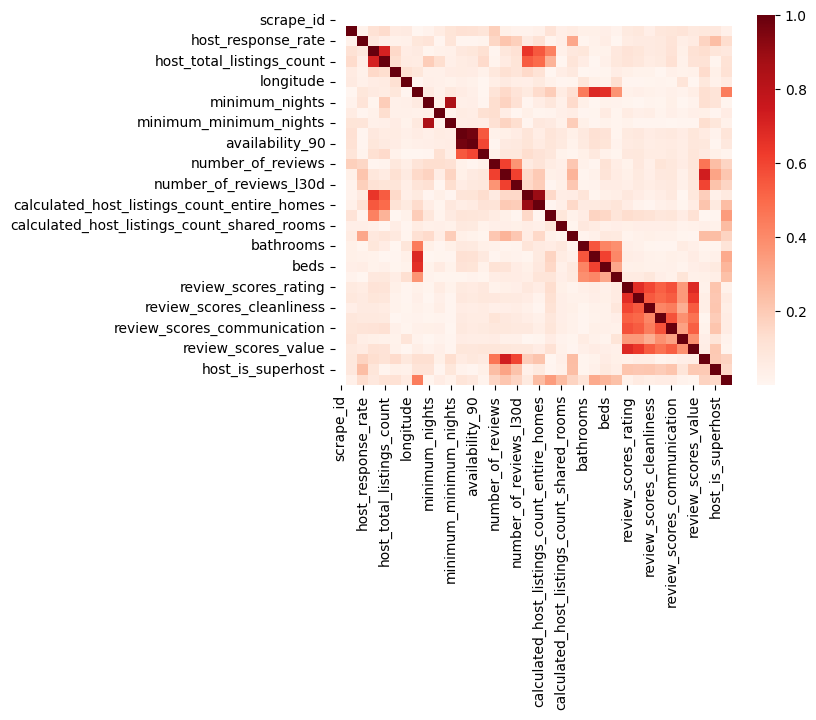

In [ ]:
Heat_Map = sns.heatmap(Corre_Factors, cmap = 'Reds', annot= False, fmt= ".2f")

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['host_response_rate', 'number_of_reviews_ltm', 'reviews_per_month']]
Vars_dep = df['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'number_of_reviews_ltm', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.47766315, 0.11841704, 0.86129384]),
 'rank_': 3,
 'singular_': array([2532.8164814 , 1077.67007024,  144.91871219]),
 'intercept_': 44.28280267154168}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['host_response_rate', 'number_of_reviews_ltm', 'reviews_per_month']])
y_pred

array([92.75749933, 90.79063732, 92.41086116, ..., 93.51331728,
       93.51331728, 93.51331728])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.14472076607751072

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.38042182649988776

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']]
Vars_dep = df['host_is_superhost']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_ltm',
        'number_of_reviews_l30d'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00067998, 0.00794707, 0.01748805]),
 'rank_': 3,
 'singular_': array([8130.19945434, 1952.49764927,  165.11352928]),
 'intercept_': 0.24573573781670358}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']])
y_pred

array([0.30765592, 0.24573574, 0.28925457, ..., 0.24573574, 0.24573574,
       0.24573574])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.1084733572439629

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.32935293720257436

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']]
Vars_dep = df['host_total_listings_count']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_listings_count', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.24101598, -0.18000131,  0.59041535]),
 'rank_': 3,
 'singular_': array([5955.1432578 , 2909.06308332, 1017.16311693]),
 'intercept_': 2.145790924719165}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['host_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']])
y_pred

array([  6.50966566,   3.79722096,  23.26470707, ...,  17.44839677,
         7.10008102, 202.02351685])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.5330978364043268

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7301354918125312

In [ ]:
#Analizar categorias de una columna
cate =df.groupby(['room_type'])['room_type'].count()
cate

,room_type
room_type,
Entire home/apt,17432
Hotel room,122
Private room,8581
Shared room,401


In [ ]:
#Eliminar un signo de una columna
df['room_type']=df['room_type'].str.replace('Entire home/apt', '1')
df['room_type']=df['room_type'].str.replace('Private room', '2')
df['room_type']=df['room_type'].str.replace('Shared room', '3')
df['room_type']=df['room_type'].str.replace('Hotel room', '4')
df['room_type']=df['room_type'].str.replace('En1ire home/ap1', '1')
df['room_type']=df['room_type'].str.replace('Priva1e room', '2')
df['room_type']=df['room_type'].str.replace('Ho1el room', '4')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a Float
df['room_type']= df['room_type'].astype(float)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['accommodates', 'calculated_host_listings_count_private_rooms', 'bedrooms']]
Vars_dep = df['room_type']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'calculated_host_listings_count_private_rooms',
        'bedrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.12322945,  0.03863098,  0.01497509]),
 'rank_': 3,
 'singular_': array([627.96817528, 293.10252998,  85.8220629 ]),
 'intercept_': 1.6597722528662668}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['accommodates', 'calculated_host_listings_count_private_rooms', 'bedrooms']])
y_pred

array([1.46691943, 1.42828845, 1.40525248, ..., 1.30505901, 1.18182956,
       1.96942416])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.26596108877038815

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5157141541303556

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['bathrooms', 'bedrooms', 'beds']]
Vars_dep = df['accommodates']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'bedrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.13837235, 0.99549017, 0.62388963]),
 'rank_': 3,
 'singular_': array([203.43734903,  96.87539905,  70.69127444]),
 'intercept_': 0.3522809472781856}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['bathrooms', 'bedrooms', 'beds']])
y_pred

array([2.73392272, 2.11003309, 6.72268062, ..., 2.11003309, 2.8031089 ,
       3.72941289])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.5748298309714861

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7581753299676046

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['accommodates', 'bathrooms', 'beds']]
Vars_dep = df['bedrooms']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.18832263, 0.35046635, 0.14542524]),
 'rank_': 3,
 'singular_': array([317.52707486, 120.02400134,  84.04819235]),
 'intercept_': 0.1615438578309687}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['accommodates', 'bathrooms', 'beds']])
y_pred

array([1.17950594, 1.0340807 , 1.585016  , ..., 1.22240332, 1.73138436,
       1.55615119])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.575060779919248

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7583276204380585

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['bathrooms', 'bedrooms', 'beds']]
Vars_dep = df['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms', 'bedrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([436.41080564, 370.2679297 ,  79.01804291]),
 'rank_': 3,
 'singular_': array([203.43734903,  96.87539905,  70.69127444]),
 'intercept_': 26.94328138593164}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['bathrooms', 'bedrooms', 'beds']])
y_pred

array([ 991.65810253,  912.64005963, 2683.03341985, ...,  912.64005963,
       1209.86350535, 1361.92603223])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.20572285329325934

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4535668123807774

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']]
Vars_dep = df['review_scores_value']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.44296258, 0.3158119 , 0.14783989]),
 'rank_': 3,
 'singular_': array([47.51063733, 22.09635835, 17.7752081 ]),
 'intercept_': 0.3966366721921899}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']])
y_pred

array([4.87806156, 4.74838565, 4.56035504, ..., 4.74838565, 4.74838565,
       4.74838565])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.5430727162939619

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7369346757304625

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_indep = df[['alcohol', 'speding']]
Vars_indep = df[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']]
Vars_dep = df['reviews_per_month']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=Vars_indep, y=Vars_dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.04778692, 0.24918051, 0.00081078]),
 'rank_': 3,
 'singular_': array([8130.19945434, 1952.49764927,  165.11352928]),
 'intercept_': 0.7779074226329385}

In [ ]:
#Predecciomso los valores del total de accidentes a partir de las variables: "alcohol", "speeding", y "no_previous"
y_pred = model.predict(X=df[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']])
y_pred

array([0.96667171, 0.77790742, 0.82979715, ..., 0.77790742, 0.77790742,
       0.77790742])

In [ ]:
#Corroboramos cual es el coficiente de Dterminación de nuestro modelo
coef_Deter=model.score(Vars_indep,Vars_dep)
coef_Deter

0.5732316193235385

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7571206108167565